<a href="https://colab.research.google.com/github/lolaBerkowitz/TgF344-AD_Open_Field/blob/main/Check_DLC_OpenField.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook loads DLC coordinates (csv) and creates plots to check tracking accuracy

*   Assumes four tracked body parts (head,neck,body,tail) 
*   Saves figures/percentage of coordinates above cutoff back to Google Drive

by Berkowitz & Harvey July 2020



##Let's mount the google drive and set path to where DLC csv files are saved. 

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Alright, lets load the python packages we'll use

In [15]:
import glob # for file names
import pandas as pd # to create data frames
from matplotlib import pyplot as plt # visualization 
import numpy as np


#Here are some functions we'll use to automate things 

In [13]:

# This will calculate the percent of the coordinates that are above a standard 
# cutoff (default is 95th percentile). df is created by plot_all_checks
def percent_good(df,cutoff = 0.95):
  lh = df['likelihood']
  return (np.mean(lh > cutoff))

# This is our plot function. Figure contains 4 x 1 subplots
def plot_DLC(df, cutoff = .95):
  #index out coordinates and likelihood values
  x = df['x']
  y = df['y']
  lh = df['likelihood']

  #create timestamps to align the coords over time
  ts = np.linspace(0,len(x)/30,len(x))

  #easy index for all 'good' coordinates
  x_g = x.loc[lh > cutoff]
  y_g = y.loc[lh > cutoff]
  ts_g = ts[lh > cutoff]

  #setup our figure and subplots
  fig, ax = plt.subplots(4,1,figsize=(15.0, 15.0))

  # First plot, shows all tracked coordinates
  ax[0].scatter(x,y, s = 0.05)
  ax[0].set_aspect('equal','box')
  ax[0].set_title('All Coordinates')

  # Second plot, these are only coordinates that pass cutoff
  ax[1].scatter(x_g,y_g, s = 0.05)
  ax[1].set_aspect('equal','box')
  ax[1].set_title('99th likelihood')

  # Third plot, shows x coords over time 
  ax[2].plot(ts,x, color = 'r',label = 'bad')
  ax[2].plot(ts_g,x_g,label = 'good')
  ax[2].set_title('All X coords over time')
  ax[2].legend()

  # Fourth plot, shows y coords over time 
  ax[3].plot(ts,y,color = 'r',label = 'bad')
  ax[3].plot(ts_g,y_g,label = 'good')
  ax[3].set_title('All Y coords over time')
  ax[3].legend()

  plt.tight_layout()

  return fig

# This is the main function. It reads in the csv file, computes/saves the percent
# good coords, and saves the figure back into the google drive. 
#
# Currently, the function is configured for 4 tracked body parts (head, neck,
# body, tail). 
 
def plot_all_checks(file_name):
  
  df = pd.read_csv(file_name,header = [1,2])

  df_head = df['head']
  df_neck = df['neck']
  df_body = df['body']
  df_tail = df['tail']
  h = []

  fig = plot_DLC(df_head)
  h.append(percent_good(df_head))
  fig.savefig(file_name.replace('.csv','')+'_head_check.png')

  fig = plot_DLC(df_neck)
  h.append(percent_good(df_neck))
  fig.savefig(file_name.replace('.csv','')+'_neck_check.png')

  fig = plot_DLC(df_body)
  h.append(percent_good(df_body))
  fig.savefig(file_name.replace('.csv','')+'_body_check.png')

  fig = plot_DLC(df_tail)
  h.append(percent_good(df_tail))
  fig.savefig(file_name.replace('.csv','')+'_tail_check.png')

  to_save = pd.DataFrame(h, index = ['head','neck','body','tail'])
  to_save.to_csv(file_name.replace('.csv','')+'_above95th.csv')


#All set! Time to run the above functions and look at your beautiful tracked coordinates :)



['//content//gdrive//My Drive//DLC_analysis//OpenField//Videos/Tg113_D2DLC_resnet101_OFJan22shuffle1_200500.csv']


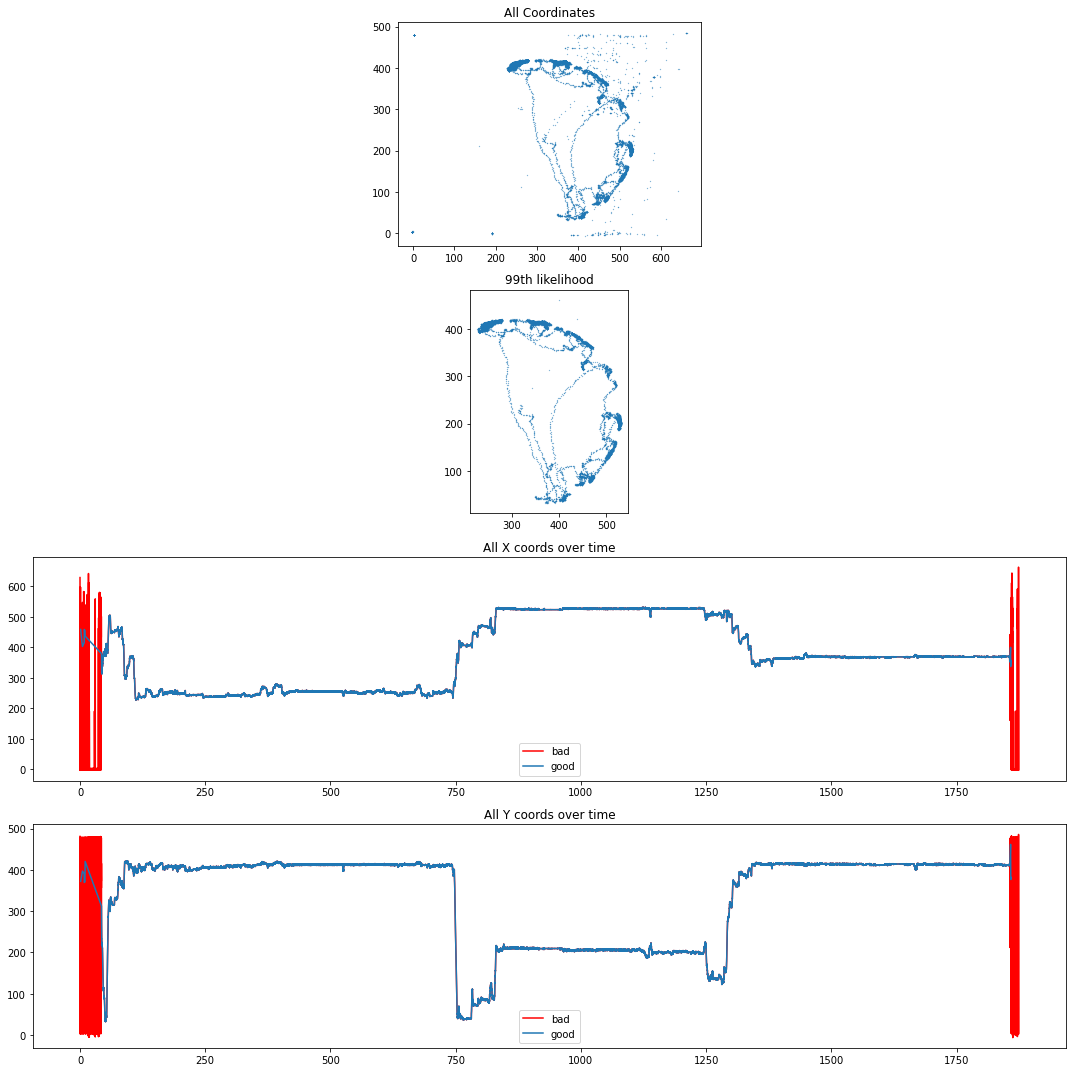

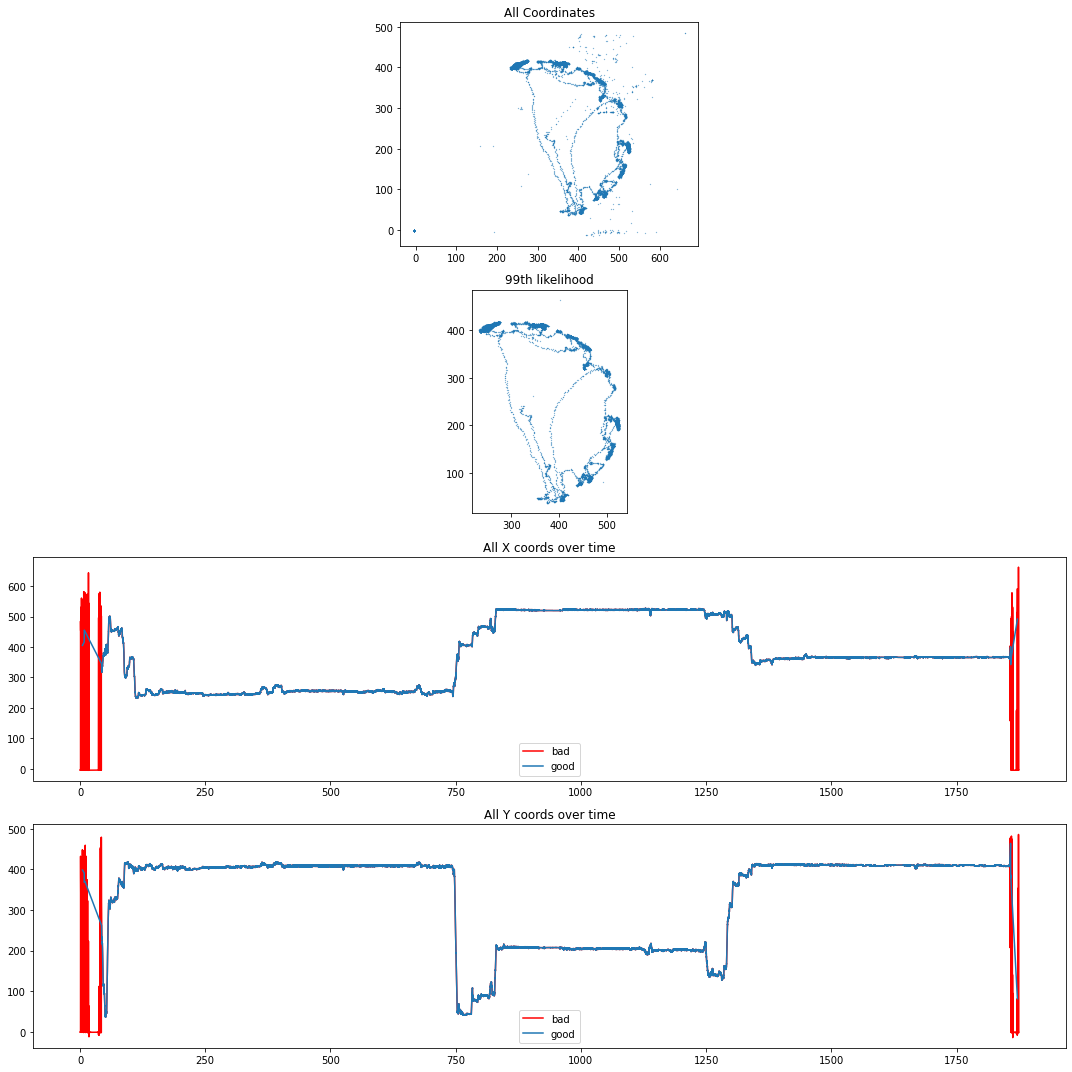

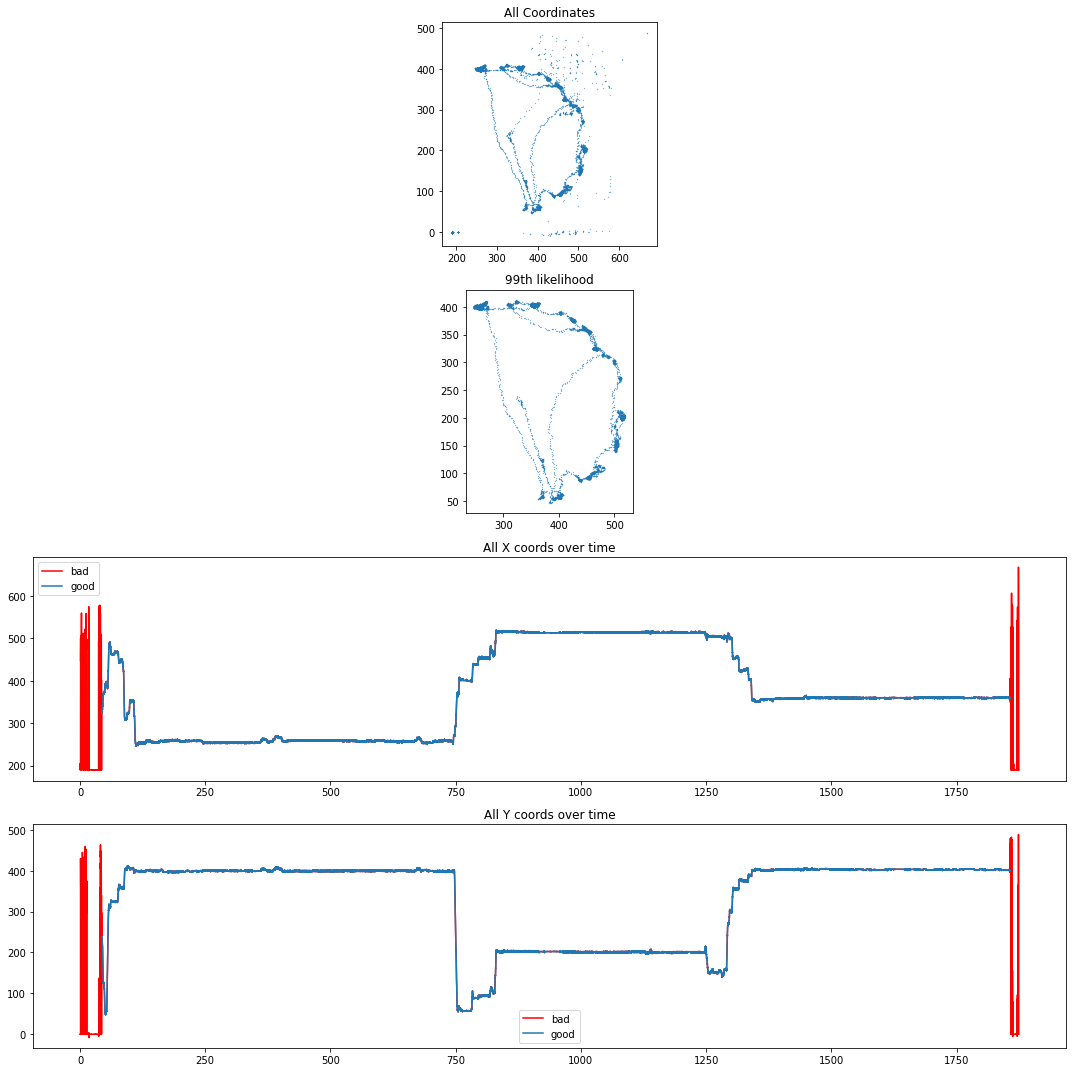

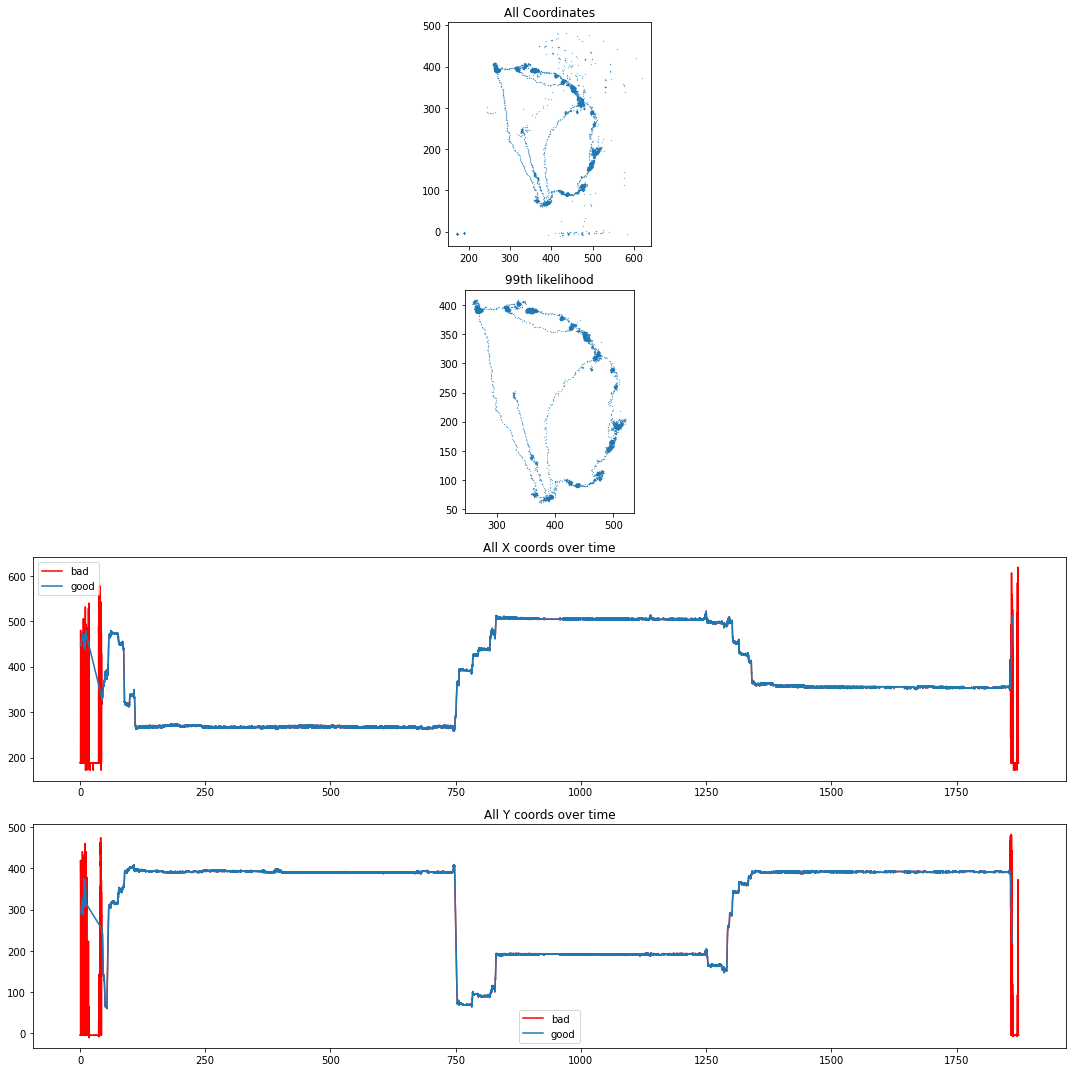

In [23]:
# Find the file paths to the coordinates
data_path = '//content//gdrive//My Drive//DLC_analysis//OpenField//Videos//'

files = glob.glob(data_path +'*.csv')
print(files)
# Loop through all csv coordinates in the directory, calculate/save percent good
# , and save images of the tracked body parts.
for file in range(len(files)):
  plot_all_checks(files[file])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')